遷移學習 Mango Classification: pick a pre-trained model

### Import必要套件

In [2]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!cp '/content/drive/MyDrive/TFkeras/mango.zip' /content

In [5]:
!unzip /content/mango.zip -d /content/

串流輸出內容已截斷至最後 5000 行。
  inflating: /content/mango/Train/00874.jpg  
  inflating: /content/mango/Train/00875.jpg  
  inflating: /content/mango/Train/00876.jpg  
  inflating: /content/mango/Train/00877.jpg  
  inflating: /content/mango/Train/00878.jpg  
  inflating: /content/mango/Train/00879.jpg  
  inflating: /content/mango/Train/00880.jpg  
  inflating: /content/mango/Train/00881.jpg  
  inflating: /content/mango/Train/00883.jpg  
  inflating: /content/mango/Train/00885.jpg  
  inflating: /content/mango/Train/00886.jpg  
  inflating: /content/mango/Train/00887.jpg  
  inflating: /content/mango/Train/00888.jpg  
  inflating: /content/mango/Train/00889.jpg  
  inflating: /content/mango/Train/00892.jpg  
  inflating: /content/mango/Train/00893.jpg  
  inflating: /content/mango/Train/00894.jpg  
  inflating: /content/mango/Train/00895.jpg  
  inflating: /content/mango/Train/00896.jpg  
  inflating: /content/mango/Train/00897.jpg  
  inflating: /content/mango/Train/00898.jpg  
  inflating: 

In [6]:
image_size = [224, 224]
batch_size = 32

### mango 分A B C 等級
載入mango數據集 從 csv檔

In [42]:
train_dir = '/content/mango/Train/'
test_dir = '/content/mango/Dev/'
dftrain = pd.read_csv(r'/content/mango/train.csv')
dftest = pd.read_csv(r'/content/mango/dev.csv')
print(dftrain.shape, dftest.shape)
print(dftrain.head())

(5600, 2) (800, 2)
    image_id label
0  00002.jpg     C
1  00003.jpg     C
2  00004.jpg     B
3  00005.jpg     A
4  00007.jpg     A


In [43]:
le = LabelEncoder()
dftrain['le'] = le.fit_transform(dftrain['label'])
dftest['le'] = le.transform(dftest['label'])
print(list(le.classes_))
print(dftrain['le'].to_numpy().tolist())

['A', 'B', 'C']
[2, 2, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 2, 1, 2, 1, 2, 0, 1, 1, 0, 1, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 2, 2, 0, 0, 1, 1, 1, 2, 2, 0, 1, 2, 0, 1, 0, 1, 0, 1, 1, 0, 1, 2, 1, 0, 0, 2, 1, 2, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 0, 1, 1, 1, 2, 2, 1, 2, 0, 1, 0, 1, 1, 2, 2, 2, 2, 2, 1, 0, 1, 1, 2, 2, 1, 1, 1, 2, 0, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 0, 0, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 1, 1, 1, 1, 0, 2, 2, 1, 2, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 2, 2, 1, 2, 2, 1, 1, 1, 1, 0, 1, 2, 0, 2, 2, 2, 0, 1, 1, 1, 0, 2, 1, 0, 2, 2, 2, 0, 2, 0, 1, 0, 2, 0, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 0, 1, 2, 0, 0, 1, 0, 1, 1, 2, 1, 0, 0, 0, 0, 0, 2, 0, 1, 2, 1, 2, 2, 2, 2, 0, 1, 0, 0, 1, 2, 0, 1, 1, 1, 0, 2, 2, 2, 2, 1, 2, 1, 2, 2, 0, 1, 2, 0, 1, 0, 1, 2, 1, 0, 2, 2, 2, 1, 1, 0, 1, 1, 2, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 0, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 0, 1, 0, 2, 2, 0, 2, 2, 1, 2, 0, 0, 1, 0, 2,

In [44]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
      "mango/Train",
      validation_split=0.2,
      subset="training",
      seed=1001,
      labels=dftrain['le'].to_numpy().tolist(),
      image_size=image_size,
      batch_size=None,
)

Found 5600 files belonging to 3 classes.
Using 4480 files for training.


In [45]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
      "mango/Train",
      validation_split=0.2,
      subset="validation",
      seed=1001,
      labels=dftrain['le'].to_numpy().tolist(),
      image_size=image_size,
      batch_size=None,
)

Found 5600 files belonging to 3 classes.
Using 1120 files for validation.


In [46]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
      "mango/Dev",
      validation_split=0.0,
      shuffle=False,
      seed=1001,
      labels=dftest['le'].to_numpy().tolist(),
      image_size=image_size,
      batch_size=None,
)

Found 800 files belonging to 3 classes.


In [47]:
# initializing label list and feeding in classes/indices
labels = train_ds.class_names

In [48]:
labels

[0, 1, 2]

### Using EfficientV2B2 model model to do transfer learning.

Data Augmentation

In [49]:
def flip(x):
    """
    flip image(翻轉影像)
    """
    x = tf.image.random_flip_left_right(x)  # 隨機左右翻轉影像
    return x

def color(x):
    """
     Color change(改變顏色)
    """
    x = tf.image.random_hue(x, 0.08)  # 隨機調整影像色調
    x = tf.image.random_saturation(x, 0.6, 1.6)  # 隨機調整影像飽和度
    x = tf.image.random_brightness(x, 0.05)  # 隨機調整影像亮度
    x = tf.image.random_contrast(x, 0.7, 1.3)  # 隨機調整影像對比度
    return x

def rotate(x):
    """
    Rotation image(影像旋轉)
    """
    # 隨機選轉n次(通過minval和maxval設定n的範圍)，每次旋轉90度
    x = tf.image.rot90(x, tf.random.uniform(shape=[], minval=1, maxval=4, dtype=tf.int32))
    return x

def zoom(x, scale_min=0.6, scale_max=1.4):
    """
    Zoom Image(影像縮放)
    """
    h, w, c = x.shape
    scale = tf.random.uniform([], scale_min, scale_max)  # 隨機縮放比例
    sh = h * scale  # 縮放後影像長度
    sw = w * scale  # 縮放後影像寬度
    x = tf.image.resize(x, (sh, sw))  # 影像縮放
    x = tf.image.resize_with_crop_or_pad(x, h, w)  # 影像裁減和填補
    return x

def parse_aug_fn(x, y):
    """
    Image Augmentation(影像增強) function
    """
    x = tf.cast(x, tf.float32)
    x = tf.keras.applications.efficientnet_v2.preprocess_input(x)
    x = flip(x)  # 隨機水平翻轉
    # 觸發顏色轉換機率50%
    x = tf.cond(tf.random.uniform([], 0, 1) > 0.5, lambda: color(x), lambda: x) # tf.cond: tensorflow的if / else條件判斷式
    # 觸發影像旋轉機率25%
    x = tf.cond(tf.random.uniform([], 0, 1) > 0.75, lambda: rotate(x), lambda: x)
    # 觸發影像縮放機率50%
    x = tf.cond(tf.random.uniform([], 0, 1) > 0.5, lambda: zoom(x), lambda: x)
    return x, tf.one_hot(y, 3)

def parse_fn(x, y):
    x = tf.cast(x, tf.float32)
    x = tf.keras.applications.efficientnet_v2.preprocess_input(x)
    return x, tf.one_hot(y, 3)

In [50]:
AUTOTUNE = tf.data.experimental.AUTOTUNE  # 自動調整模式

train_ds = train_ds.map(map_func=parse_aug_fn, num_parallel_calls=AUTOTUNE)
# 設定批次大小並將prefetch模式開啟(暫存空間為自動調整模式)。
train_ds = train_ds.batch(batch_size).prefetch(buffer_size=AUTOTUNE)

val_ds = val_ds.map(map_func=parse_aug_fn, num_parallel_calls=AUTOTUNE)
# 設定批次大小並將prefetch模式開啟(暫存空間為自動調整模式)。
val_ds = val_ds.batch(batch_size).prefetch(buffer_size=AUTOTUNE)

test_ds = test_ds.map(map_func=parse_fn, num_parallel_calls=AUTOTUNE)
# 設定批次大小並將prefetch模式開啟(暫存空間為自動調整模式)。
test_ds = test_ds.batch(batch_size).prefetch(buffer_size=AUTOTUNE)

In [51]:
# 創建遷移學習模型，匯入EfficientNetV2B2模型
base_model = tf.keras.applications.EfficientNetV2B2(include_top=False,
                               weights='imagenet',
                               pooling='avg',
                               input_shape=image_size+[3]) # [224, 224, 3] # w,h,c
# 將剛創建的EfficientNetV2B2模型接上兩層全連接層，並且最後一層使用Softmax輸出
model_1 = tf.keras.Sequential()
model_1.add(base_model)
model_1.add(layers.Dense(128, activation='relu'))
model_1.add(layers.Dense(3, activation='softmax'))


In [52]:
model_1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-b2 (Functio  (None, 1408)              8769374   
 nal)                                                            
                                                                 
 dense_8 (Dense)             (None, 128)               180352    
                                                                 
 dense_9 (Dense)             (None, 3)                 387       
                                                                 
Total params: 8950113 (34.14 MB)
Trainable params: 8867825 (33.83 MB)
Non-trainable params: 82288 (321.44 KB)
_________________________________________________________________


In [53]:
# 儲存最好的網路模型權重
model_mckp = keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/TFkeras/EfficientV2B2.h5',
                                             monitor='val_categorical_accuracy',
                                             save_best_only=True,
                                             mode='max')
# 設定停止訓練的條件(當Accuracy超過5迭代沒有上升的話訓練會終止)
model_esp = keras.callbacks.EarlyStopping(monitor='val_categorical_accuracy', patience=5)

In [54]:
adam = optimizers.Adam(learning_rate=1e-3)
rlr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, verbose=1, min_delta=0.0001)

model_1.compile(optimizer=adam,
                loss='categorical_crossentropy',
                metrics=['categorical_accuracy'])

In [55]:
history = model_1.fit(train_ds,
                        validation_data=val_ds,
                        epochs=30,
                        callbacks=[rlr, model_mckp, model_esp])

Epoch 1/30
70/70 [==============================] - ETA: 0s - loss: 0.6933 - categorical_accuracy: 0.6888

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


70/70 [==============================] - 107s 744ms/step - loss: 0.6933 - categorical_accuracy: 0.6888 - val_loss: 0.6012 - val_categorical_accuracy: 0.7107 - lr: 0.0010
Epoch 2/30
70/70 [==============================] - 56s 747ms/step - loss: 0.5720 - categorical_accuracy: 0.7556 - val_loss: 0.5569 - val_categorical_accuracy: 0.7482 - lr: 0.0010
Epoch 3/30
70/70 [==============================] - 53s 705ms/step - loss: 0.5355 - categorical_accuracy: 0.7558 - val_loss: 0.5751 - val_categorical_accuracy: 0.7366 - lr: 0.0010
Epoch 4/30
70/70 [==============================] - 57s 757ms/step - loss: 0.4912 - categorical_accuracy: 0.7846 - val_loss: 0.5062 - val_categorical_accuracy: 0.7598 - lr: 0.0010
Epoch 5/30
70/70 [==============================] - 55s 711ms/step - loss: 0.4918 - categorical_accuracy: 0.7826 - val_loss: 0.5219 - val_categorical_accuracy: 0.7643 - lr: 0.0010
Epoch 6/30
70/70 [==============================] - ETA: 0s - loss: 0.4606 - categorical_accuracy: 0.7987
Epoc

In [22]:
from sklearn.metrics import confusion_matrix
from tensorflow.keras import backend as K
import itertools

def get_conf_matrix(model, size, image_size):
    predictions =[]
    true_y = []
    for x,y in test_ds:
        predprob = model.predict(x)
        # decoding one-hot
        prediction = np.argmax(predprob, axis=1)
        y = np.argmax(y, axis =1)

        predictions = np.concatenate((predictions, prediction))
        true_y = np.concatenate((true_y, y))
        if len(predictions) >=size:
            break
    matrix = confusion_matrix(true_y, predictions)

    return matrix

In [57]:
model = tf.keras.models.load_model('/content/drive/MyDrive/TFkeras/EfficientV2B2.h5')
conf_matrix_inc = get_conf_matrix(model, 800, image_size) #image:224:224 / batch 64
print(conf_matrix_inc[:,:])
del model
K.clear_session()

1/1 [==============================] - 0s 163ms/step
[[194  49   0]
 [ 42 237  14]
 [  2  37 225]]


Confusion matrix, without normalization
[[194  49   0]
 [ 42 237  14]
 [  2  37 225]]


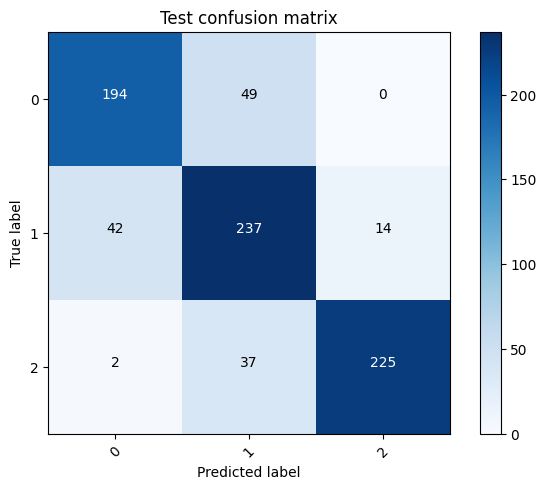

In [58]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=False`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plot_confusion_matrix(conf_matrix_inc, labels, title = "Test confusion matrix")

In [59]:
sum([conf_matrix_inc[i, i] for i in range(3)])/800.0

0.82

Xception

In [75]:
train_dir = '/content/mango/Train/'
test_dir = '/content/mango/Dev/'
dftrain = pd.read_csv(r'/content/mango/train.csv')
dftest = pd.read_csv(r'/content/mango/dev.csv')
print(dftrain.shape, dftest.shape)
print(dftrain.head())

(5600, 2) (800, 2)
    image_id label
0  00002.jpg     C
1  00003.jpg     C
2  00004.jpg     B
3  00005.jpg     A
4  00007.jpg     A


In [76]:
le = LabelEncoder()
dftrain['le'] = le.fit_transform(dftrain['label'])
dftest['le'] = le.transform(dftest['label'])
print(list(le.classes_))
print(dftrain['le'].to_numpy().tolist())

['A', 'B', 'C']
[2, 2, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 2, 1, 2, 1, 2, 0, 1, 1, 0, 1, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 2, 2, 0, 0, 1, 1, 1, 2, 2, 0, 1, 2, 0, 1, 0, 1, 0, 1, 1, 0, 1, 2, 1, 0, 0, 2, 1, 2, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 0, 1, 1, 1, 2, 2, 1, 2, 0, 1, 0, 1, 1, 2, 2, 2, 2, 2, 1, 0, 1, 1, 2, 2, 1, 1, 1, 2, 0, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 0, 0, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 1, 1, 1, 1, 0, 2, 2, 1, 2, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 2, 2, 1, 2, 2, 1, 1, 1, 1, 0, 1, 2, 0, 2, 2, 2, 0, 1, 1, 1, 0, 2, 1, 0, 2, 2, 2, 0, 2, 0, 1, 0, 2, 0, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 0, 1, 2, 0, 0, 1, 0, 1, 1, 2, 1, 0, 0, 0, 0, 0, 2, 0, 1, 2, 1, 2, 2, 2, 2, 0, 1, 0, 0, 1, 2, 0, 1, 1, 1, 0, 2, 2, 2, 2, 1, 2, 1, 2, 2, 0, 1, 2, 0, 1, 0, 1, 2, 1, 0, 2, 2, 2, 1, 1, 0, 1, 1, 2, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 0, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 0, 1, 0, 2, 2, 0, 2, 2, 1, 2, 0, 0, 1, 0, 2,

In [77]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
      "mango/Train",
      validation_split=0.2,
      subset="training",
      seed=1001,
      labels=dftrain['le'].to_numpy().tolist(),
      image_size=image_size,
      batch_size=None,
)

Found 5600 files belonging to 3 classes.
Using 4480 files for training.


In [78]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
      "mango/Train",
      validation_split=0.2,
      subset="validation",
      seed=1001,
      labels=dftrain['le'].to_numpy().tolist(),
      image_size=image_size,
      batch_size=None,
)

Found 5600 files belonging to 3 classes.
Using 1120 files for validation.


In [79]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
      "mango/Dev",
      validation_split=0.0,
      shuffle=False,
      seed=1001,
      labels=dftest['le'].to_numpy().tolist(),
      image_size=image_size,
      batch_size=None,
)

Found 800 files belonging to 3 classes.


In [80]:
# initializing label list and feeding in classes/indices
labels = train_ds.class_names

In [81]:
labels

[0, 1, 2]

In [82]:
def flip(x):
    """
    flip image(翻轉影像)
    """
    x = tf.image.random_flip_left_right(x)  # 隨機左右翻轉影像
    return x

def color(x):
    """
     Color change(改變顏色)
    """
    x = tf.image.random_hue(x, 0.08)  # 隨機調整影像色調
    x = tf.image.random_saturation(x, 0.6, 1.6)  # 隨機調整影像飽和度
    x = tf.image.random_brightness(x, 0.05)  # 隨機調整影像亮度
    x = tf.image.random_contrast(x, 0.7, 1.3)  # 隨機調整影像對比度
    return x

def rotate(x):
    """
    Rotation image(影像旋轉)
    """
    # 隨機選轉n次(通過minval和maxval設定n的範圍)，每次選轉90度
    x = tf.image.rot90(x, tf.random.uniform(shape=[], minval=1, maxval=4, dtype=tf.int32))
    return x

def zoom(x, scale_min=0.6, scale_max=1.4):
    """
    Zoom Image(影像縮放)
    """
    h, w, c = x.shape
    scale = tf.random.uniform([], scale_min, scale_max)  # 隨機縮放比例
    sh = h * scale  # 縮放後影像長度
    sw = w * scale  # 縮放後影像寬度
    x = tf.image.resize(x, (sh, sw))  # 影像縮放
    x = tf.image.resize_with_crop_or_pad(x, h, w)  # 影像裁減和填補
    return x

def parse_aug_fn(x, y):
    """
    Image Augmentation(影像增強) function
    """
    x = tf.cast(x, tf.float32)
    x = tf.keras.applications.xception.preprocess_input(x)
    x = flip(x)  # 隨機水平翻轉
    # 觸發顏色轉換機率70%
    x = tf.cond(tf.random.uniform([], 0, 1) > 0.3, lambda: color(x), lambda: x) # tf.cond: tensorflow的if / else條件判斷式
    # 觸發影像旋轉機率50%
    x = tf.cond(tf.random.uniform([], 0, 1) > 0.5, lambda: rotate(x), lambda: x)
    # 觸發影像縮放機率70%
    x = tf.cond(tf.random.uniform([], 0, 1) > 0.3, lambda: zoom(x), lambda: x)
    return x, tf.one_hot(y, 3)

def parse_fn(x, y):
    x = tf.cast(x, tf.float32)
    x = tf.keras.applications.xception.preprocess_input(x)
    return x, tf.one_hot(y, 3)

In [83]:
AUTOTUNE = tf.data.experimental.AUTOTUNE  # 自動調整模式

train_ds = train_ds.map(map_func=parse_aug_fn, num_parallel_calls=AUTOTUNE)
# 設定批次大小並將prefetch模式開啟(暫存空間為自動調整模式)。
train_ds = train_ds.batch(batch_size).prefetch(buffer_size=AUTOTUNE)

val_ds = val_ds.map(map_func=parse_aug_fn, num_parallel_calls=AUTOTUNE)
# 設定批次大小並將prefetch模式開啟(暫存空間為自動調整模式)。
val_ds = val_ds.batch(batch_size).prefetch(buffer_size=AUTOTUNE)

test_ds = test_ds.map(map_func=parse_fn, num_parallel_calls=AUTOTUNE)
# 設定批次大小並將prefetch模式開啟(暫存空間為自動調整模式)。
test_ds = test_ds.batch(batch_size).prefetch(buffer_size=AUTOTUNE)

In [84]:
# 創建遷移學習模型，匯入Xception模型
base_model = tf.keras.applications.Xception(include_top=False,
                               weights='imagenet',
                               pooling='avg',
                               input_shape=image_size+[3]) # [224, 224, 3] # w,h,c
#將剛創建的Xception模型接上兩層全連接層，並且最後一層使用Softmax輸出
model_2 = tf.keras.Sequential()
model_2.add(base_model)
model_2.add(layers.Dense(128, activation='relu'))
model_2.add(layers.Dense(3, activation='softmax'))


In [85]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 dense_2 (Dense)             (None, 128)               262272    
                                                                 
 dense_3 (Dense)             (None, 3)                 387       
                                                                 
Total params: 21124139 (80.58 MB)
Trainable params: 21069611 (80.37 MB)
Non-trainable params: 54528 (213.00 KB)
_________________________________________________________________


In [86]:
# 儲存最好的網路模型權重
model_mckp = keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/TFkeras/Xception.h5',
                                             monitor='val_categorical_accuracy',
                                             save_best_only=True,
                                             mode='max')
# 設定停止訓練的條件(當Accuracy超過5迭代沒有上升的話訓練會終止)
model_esp = keras.callbacks.EarlyStopping(monitor='val_categorical_accuracy', patience=5)

In [87]:
adam = optimizers.Adam(learning_rate=1e-3)
rlr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, verbose=1, min_delta=0.0001)

model_2.compile(optimizer=adam,
                loss='categorical_crossentropy',
                metrics=['categorical_accuracy'])

In [88]:
history = model_2.fit(train_ds,
                        validation_data=val_ds,
                        epochs=30,
                        callbacks=[rlr, model_mckp, model_esp])

Epoch 1/30
70/70 [==============================] - ETA: 0s - loss: 0.6781 - categorical_accuracy: 0.6955

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


70/70 [==============================] - 128s 1s/step - loss: 0.6781 - categorical_accuracy: 0.6955 - val_loss: 10.4317 - val_categorical_accuracy: 0.4804 - lr: 0.0010
Epoch 2/30
70/70 [==============================] - 97s 1s/step - loss: 0.5749 - categorical_accuracy: 0.7402 - val_loss: 2.6434 - val_categorical_accuracy: 0.5268 - lr: 0.0010
Epoch 3/30
70/70 [==============================] - 145s 2s/step - loss: 0.5693 - categorical_accuracy: 0.7429 - val_loss: 0.9137 - val_categorical_accuracy: 0.7036 - lr: 0.0010
Epoch 4/30
70/70 [==============================] - 86s 1s/step - loss: 0.5375 - categorical_accuracy: 0.7592 - val_loss: 0.8667 - val_categorical_accuracy: 0.6786 - lr: 0.0010
Epoch 5/30
70/70 [==============================] - 102s 1s/step - loss: 0.5274 - categorical_accuracy: 0.7645 - val_loss: 0.9259 - val_categorical_accuracy: 0.7098 - lr: 0.0010
Epoch 6/30
70/70 [==============================] - 102s 1s/step - loss: 0.5185 - categorical_accuracy: 0.7683 - val_loss:

In [89]:
model = tf.keras.models.load_model('/content/drive/MyDrive/TFkeras/Xception.h5')
conf_matrix_inc = get_conf_matrix(model, 800, image_size)
print(conf_matrix_inc[:,:])
del model
K.clear_session()

1/1 [==============================] - 0s 52ms/step
[[201  41   1]
 [ 57 216  20]
 [  3  28 233]]


Confusion matrix, without normalization
[[201  41   1]
 [ 57 216  20]
 [  3  28 233]]


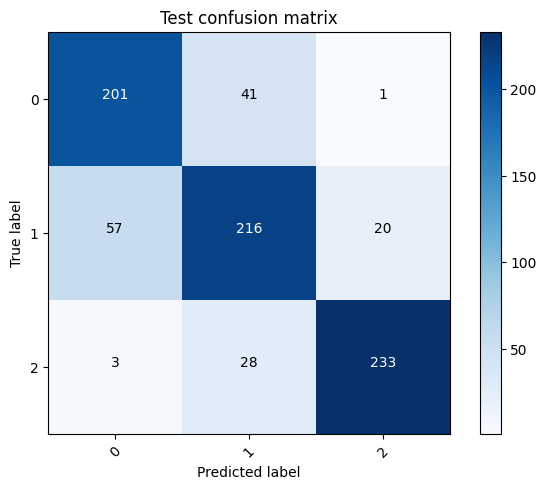

In [90]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=False`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plot_confusion_matrix(conf_matrix_inc, labels, title = "Test confusion matrix")

In [91]:
sum([conf_matrix_inc[i, i] for i in range(3)])/800.0

0.8125

# EfficientNetV2S

In [7]:
train_dir = '/content/mango/Train/'
test_dir = '/content/mango/Dev/'
dftrain = pd.read_csv(r'/content/mango/train.csv')
dftest = pd.read_csv(r'/content/mango/dev.csv')
print(dftrain.shape, dftest.shape)
print(dftrain.head())

(5600, 2) (800, 2)
    image_id label
0  00002.jpg     C
1  00003.jpg     C
2  00004.jpg     B
3  00005.jpg     A
4  00007.jpg     A


In [8]:
le = LabelEncoder()
dftrain['le'] = le.fit_transform(dftrain['label'])
dftest['le'] = le.transform(dftest['label'])
print(list(le.classes_))
print(dftrain['le'].to_numpy().tolist())

['A', 'B', 'C']
[2, 2, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 2, 1, 2, 1, 2, 0, 1, 1, 0, 1, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 2, 2, 0, 0, 1, 1, 1, 2, 2, 0, 1, 2, 0, 1, 0, 1, 0, 1, 1, 0, 1, 2, 1, 0, 0, 2, 1, 2, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 0, 1, 1, 1, 2, 2, 1, 2, 0, 1, 0, 1, 1, 2, 2, 2, 2, 2, 1, 0, 1, 1, 2, 2, 1, 1, 1, 2, 0, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 0, 0, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 1, 1, 1, 1, 0, 2, 2, 1, 2, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 2, 2, 1, 2, 2, 1, 1, 1, 1, 0, 1, 2, 0, 2, 2, 2, 0, 1, 1, 1, 0, 2, 1, 0, 2, 2, 2, 0, 2, 0, 1, 0, 2, 0, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 0, 1, 2, 0, 0, 1, 0, 1, 1, 2, 1, 0, 0, 0, 0, 0, 2, 0, 1, 2, 1, 2, 2, 2, 2, 0, 1, 0, 0, 1, 2, 0, 1, 1, 1, 0, 2, 2, 2, 2, 1, 2, 1, 2, 2, 0, 1, 2, 0, 1, 0, 1, 2, 1, 0, 2, 2, 2, 1, 1, 0, 1, 1, 2, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 0, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 0, 1, 0, 2, 2, 0, 2, 2, 1, 2, 0, 0, 1, 0, 2,

In [9]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
      "mango/Train",
      validation_split=0.2,
      subset="training",
      seed=1001,
      labels=dftrain['le'].to_numpy().tolist(),
      image_size=image_size,
      batch_size=None,
)

Found 5600 files belonging to 3 classes.
Using 4480 files for training.


In [10]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
      "mango/Train",
      validation_split=0.2,
      subset="validation",
      seed=1001,
      labels=dftrain['le'].to_numpy().tolist(),
      image_size=image_size,
      batch_size=None,
)

Found 5600 files belonging to 3 classes.
Using 1120 files for validation.


In [11]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
      "mango/Dev",
      validation_split=0.0,
      shuffle=False,
      seed=1001,
      labels=dftest['le'].to_numpy().tolist(),
      image_size=image_size,
      batch_size=None,
)

Found 800 files belonging to 3 classes.


In [12]:
# initializing label list and feeding in classes/indices
labels = train_ds.class_names

In [13]:
labels

[0, 1, 2]

In [14]:
def flip(x):
    """
    flip image(翻轉影像)
    """
    x = tf.image.random_flip_left_right(x)  # 隨機左右翻轉影像
    return x

def color(x):
    """
     Color change(改變顏色)
    """
    x = tf.image.random_hue(x, 0.08)  # 隨機調整影像色調
    x = tf.image.random_saturation(x, 0.6, 1.6)  # 隨機調整影像飽和度
    x = tf.image.random_brightness(x, 0.05)  # 隨機調整影像亮度
    x = tf.image.random_contrast(x, 0.7, 1.3)  # 隨機調整影像對比度
    return x

def rotate(x):
    """
    Rotation image(影像旋轉)
    """
    # 隨機選轉n次(通過minval和maxval設定n的範圍)，每次選轉90度
    x = tf.image.rot90(x, tf.random.uniform(shape=[], minval=1, maxval=4, dtype=tf.int32))
    return x

def zoom(x, scale_min=0.6, scale_max=1.4):
    """
    Zoom Image(影像縮放)
    """
    h, w, c = x.shape
    scale = tf.random.uniform([], scale_min, scale_max)  # 隨機縮放比例
    sh = h * scale  # 縮放後影像長度
    sw = w * scale  # 縮放後影像寬度
    x = tf.image.resize(x, (sh, sw))  # 影像縮放
    x = tf.image.resize_with_crop_or_pad(x, h, w)  # 影像裁減和填補
    return x

def parse_aug_fn(x, y):
    """
    Image Augmentation(影像增強) function
    """
    x = tf.cast(x, tf.float32)
    x = tf.keras.applications.efficientnet_v2.preprocess_input(x)
    x = flip(x)  # 隨機水平翻轉
    # 觸發顏色轉換機率70%
    x = tf.cond(tf.random.uniform([], 0, 1) > 0.3, lambda: color(x), lambda: x) # tf.cond: tensorflow的if / else條件判斷式
    # 觸發影像旋轉機率70%
    x = tf.cond(tf.random.uniform([], 0, 1) > 0.3, lambda: rotate(x), lambda: x)
    # 觸發影像縮放機率70%
    x = tf.cond(tf.random.uniform([], 0, 1) > 0.3, lambda: zoom(x), lambda: x)
    return x, tf.one_hot(y, 3)

def parse_fn(x, y):
    x = tf.cast(x, tf.float32)
    x = tf.keras.applications.efficientnet_v2.preprocess_input(x)
    return x, tf.one_hot(y, 3)

In [15]:
AUTOTUNE = tf.data.experimental.AUTOTUNE  # 自動調整模式

train_ds = train_ds.map(map_func=parse_aug_fn, num_parallel_calls=AUTOTUNE)
# 設定批次大小並將prefetch模式開啟(暫存空間為自動調整模式)。
train_ds = train_ds.batch(batch_size).prefetch(buffer_size=AUTOTUNE)

val_ds = val_ds.map(map_func=parse_aug_fn, num_parallel_calls=AUTOTUNE)
# 設定批次大小並將prefetch模式開啟(暫存空間為自動調整模式)。
val_ds = val_ds.batch(batch_size).prefetch(buffer_size=AUTOTUNE)


test_ds = test_ds.map(map_func=parse_fn, num_parallel_calls=AUTOTUNE)
# 設定批次大小並將prefetch模式開啟(暫存空間為自動調整模式)。
test_ds = test_ds.batch(batch_size).prefetch(buffer_size=AUTOTUNE)

In [16]:
# 創建遷移學習模型，匯入EfficientNetV2S模型
base_model = tf.keras.applications.EfficientNetV2S(include_top=False,
                               weights='imagenet',
                               pooling='avg',
                               input_shape=image_size+[3]) # [299, 299, 3] # w,h,c
# 將剛創建的EfficientNetV2S模型接上兩層全連接層，並且最後一層使用Softmax輸出
model_3 = tf.keras.Sequential()
model_3.add(base_model)
model_3.add(layers.Dense(128, activation='relu'))
model_3.add(layers.Dense(3, activation='softmax'))


82420632/82420632 [==============================] - 5s 0us/step


In [17]:
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-s (Function  (None, 1280)              20331360  
 al)                                                             
                                                                 
 dense (Dense)               (None, 128)               163968    
                                                                 
 dense_1 (Dense)             (None, 3)                 387       
                                                                 
Total params: 20495715 (78.18 MB)
Trainable params: 20341843 (77.60 MB)
Non-trainable params: 153872 (601.06 KB)
_________________________________________________________________


In [18]:
# 儲存最好的網路模型權重
model_mckp = keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/TFkeras/EfficientNetV2S.h5',
                                             monitor='val_categorical_accuracy',
                                             save_best_only=True,
                                             mode='max')
# 設定停止訓練的條件(當Accuracy超過5迭代沒有上升的話訓練會終止)
model_esp = keras.callbacks.EarlyStopping(monitor='val_categorical_accuracy', patience=5)

In [19]:
adam = optimizers.Adam(learning_rate=1e-3)
rlr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, verbose=1, min_delta=0.0001)

model_3.compile(optimizer=adam,
                loss='categorical_crossentropy',
                metrics=['categorical_accuracy'])

In [20]:
history = model_3.fit(train_ds,
                        validation_data=val_ds,
                        epochs=30,
                        callbacks=[rlr, model_mckp, model_esp])

Epoch 1/30
140/140 [==============================] - ETA: 0s - loss: 0.6963 - categorical_accuracy: 0.6797

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


140/140 [==============================] - 254s 1s/step - loss: 0.6963 - categorical_accuracy: 0.6797 - val_loss: 0.5652 - val_categorical_accuracy: 0.7402 - lr: 0.0010
Epoch 2/30
140/140 [==============================] - 167s 1s/step - loss: 0.5820 - categorical_accuracy: 0.7379 - val_loss: 0.5815 - val_categorical_accuracy: 0.7429 - lr: 0.0010
Epoch 3/30
140/140 [==============================] - 168s 1s/step - loss: 0.5820 - categorical_accuracy: 0.7496 - val_loss: 0.5604 - val_categorical_accuracy: 0.7536 - lr: 0.0010
Epoch 4/30
140/140 [==============================] - 164s 1s/step - loss: 0.5482 - categorical_accuracy: 0.7547 - val_loss: 0.5156 - val_categorical_accuracy: 0.7795 - lr: 0.0010
Epoch 5/30
140/140 [==============================] - 159s 1s/step - loss: 0.5275 - categorical_accuracy: 0.7618 - val_loss: 0.5507 - val_categorical_accuracy: 0.7482 - lr: 0.0010
Epoch 6/30
140/140 [==============================] - 170s 1s/step - loss: 0.5184 - categorical_accuracy: 0.775

KeyboardInterrupt: ignored

In [23]:
model = tf.keras.models.load_model('/content/drive/MyDrive/TFkeras/EfficientNetV2S.h5')
conf_matrix_inc = get_conf_matrix(model, 800, image_size)
print(conf_matrix_inc[:,:])
del model
K.clear_session()

1/1 [==============================] - 0s 66ms/step
[[212  31   0]
 [ 53 228  12]
 [  3  35 226]]


Confusion matrix, without normalization
[[212  31   0]
 [ 53 228  12]
 [  3  35 226]]


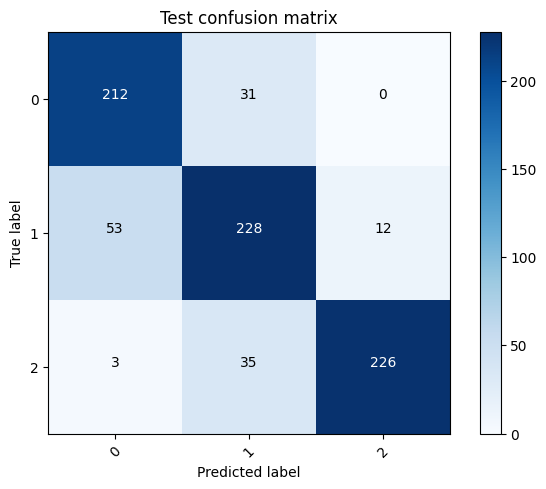

In [24]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=False`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plot_confusion_matrix(conf_matrix_inc, labels, title = "Test confusion matrix")

In [25]:
sum([conf_matrix_inc[i, i] for i in range(3)])/800.0

0.8325

Enssemble Learning

In [43]:
train_dir = '/content/mango/Train/'
test_dir = '/content/mango/Dev/'
dftrain = pd.read_csv(r'/content/mango/train.csv')
dftest = pd.read_csv(r'/content/mango/dev.csv')
print(dftrain.shape, dftest.shape)
print(dftrain.head())

(5600, 2) (800, 2)
    image_id label
0  00002.jpg     C
1  00003.jpg     C
2  00004.jpg     B
3  00005.jpg     A
4  00007.jpg     A


In [44]:
le = LabelEncoder()
dftrain['le'] = le.fit_transform(dftrain['label'])
dftest['le'] = le.transform(dftest['label'])
print(list(le.classes_))
print(dftrain['le'].to_numpy().tolist())

['A', 'B', 'C']
[2, 2, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 2, 1, 2, 1, 2, 0, 1, 1, 0, 1, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 2, 2, 0, 0, 1, 1, 1, 2, 2, 0, 1, 2, 0, 1, 0, 1, 0, 1, 1, 0, 1, 2, 1, 0, 0, 2, 1, 2, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 0, 1, 1, 1, 2, 2, 1, 2, 0, 1, 0, 1, 1, 2, 2, 2, 2, 2, 1, 0, 1, 1, 2, 2, 1, 1, 1, 2, 0, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 0, 0, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 1, 1, 1, 1, 0, 2, 2, 1, 2, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 2, 2, 1, 2, 2, 1, 1, 1, 1, 0, 1, 2, 0, 2, 2, 2, 0, 1, 1, 1, 0, 2, 1, 0, 2, 2, 2, 0, 2, 0, 1, 0, 2, 0, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 0, 1, 2, 0, 0, 1, 0, 1, 1, 2, 1, 0, 0, 0, 0, 0, 2, 0, 1, 2, 1, 2, 2, 2, 2, 0, 1, 0, 0, 1, 2, 0, 1, 1, 1, 0, 2, 2, 2, 2, 1, 2, 1, 2, 2, 0, 1, 2, 0, 1, 0, 1, 2, 1, 0, 2, 2, 2, 1, 1, 0, 1, 1, 2, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 0, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 0, 1, 0, 2, 2, 0, 2, 2, 1, 2, 0, 0, 1, 0, 2,

In [46]:
image_size = [224, 224]
batch_size = 64

In [47]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
      "mango/Dev",
      validation_split=0.0,
      shuffle=False,
      seed=1001,
      labels=dftest['le'].to_numpy().tolist(),
      image_size=image_size,
      batch_size=None,
)

Found 800 files belonging to 3 classes.


In [48]:
labels = test_ds.class_names

In [49]:
def parse_EV2B2(x, y): # for resnet_50
    x = tf.cast(x, tf.float32)
    x = tf.keras.applications.efficientnet_v2.preprocess_input(x)
    return x, tf.one_hot(y, 3)

def parse_Xception(x, y): # for inception_v3
    x = tf.cast(x, tf.float32)
    x = tf.keras.applications.xception.preprocess_input(x)
    return x, tf.one_hot(y, 3)

def parse_EV2S(x, y): # for resnet_50
    x = tf.cast(x, tf.float32)
    x = tf.keras.applications.efficientnet_v2.preprocess_input(x)
    return x, tf.one_hot(y, 3)


AUTOTUNE = tf.data.experimental.AUTOTUNE  # 自動調整模式

test_ds_EV = test_ds.map(map_func=parse_EV2B2, num_parallel_calls=AUTOTUNE)
# 設定批次大小並將prefetch模式開啟(暫存空間為自動調整模式)。
test_ds_EV = test_ds_EV.batch(batch_size).prefetch(buffer_size=AUTOTUNE)

test_ds_Xception = test_ds.map(map_func=parse_Xception, num_parallel_calls=AUTOTUNE)
# 設定批次大小並將prefetch模式開啟(暫存空間為自動調整模式)。
test_ds_Xception = test_ds_Xception.batch(batch_size).prefetch(buffer_size=AUTOTUNE)

## EV2B2 predict

In [50]:
from sklearn.metrics import confusion_matrix
from tensorflow.keras import backend as K
import itertools

def get_conf_matrix(dataset, model, lenlab, size, image_size):
    prediction = []
    predictions = []
    true_y = []
    predictprob = np.empty([size, lenlab])

    ix = 0
    for x,y in dataset:
        prediction =  model.predict(x) # (1,2)
        predictprob[ix*batch_size:(ix+1)*batch_size,:] = prediction
        # decoding one-hot
        prediction = np.argmax(prediction, axis=1)
        y = np.argmax(y, axis =1)

        predictions = np.concatenate((predictions, prediction))
        true_y = np.concatenate((true_y, y))
        if len(predictions) >=size:
            break
        ix+=1

    matrix = confusion_matrix(true_y, predictions)

    return predictprob, matrix

In [51]:
model = tf.keras.models.load_model('/content/drive/MyDrive/TFkeras/EfficientV2B2.h5')
pred_V2B2, conf_matrix_V2B2 = get_conf_matrix(test_ds_EV, model, len(labels), 800, image_size)
print(conf_matrix_V2B2[:,:])
del model
K.clear_session()

1/1 [==============================] - 0s 38ms/step
[[194  49   0]
 [ 42 237  14]
 [  2  37 225]]


In [52]:
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix
[[0.79835391 0.20164609 0.        ]
 [0.14334471 0.80887372 0.04778157]
 [0.00757576 0.14015152 0.85227273]]


0.82

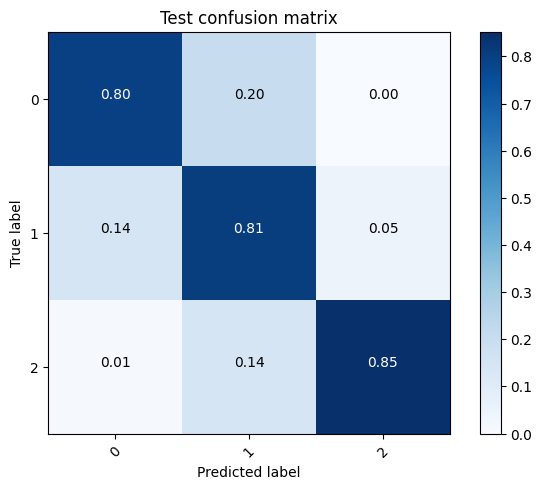

In [53]:
plot_confusion_matrix(conf_matrix_V2B2, labels, title = "Test confusion matrix")
sum([conf_matrix_V2B2[i, i] for i in range(3)])/800.0

# Xception

In [54]:
model = tf.keras.models.load_model('/content/drive/MyDrive/TFkeras/Xception.h5')
pred_X, conf_matrix_X = get_conf_matrix(test_ds_Xception, model, len(labels), 800, image_size)
print(conf_matrix_X[:,:])
del model
K.clear_session()

1/1 [==============================] - 0s 34ms/step
[[201  41   1]
 [ 57 216  20]
 [  3  28 233]]


Normalized confusion matrix
[[0.82716049 0.16872428 0.00411523]
 [0.19453925 0.73720137 0.06825939]
 [0.01136364 0.10606061 0.88257576]]


0.8125

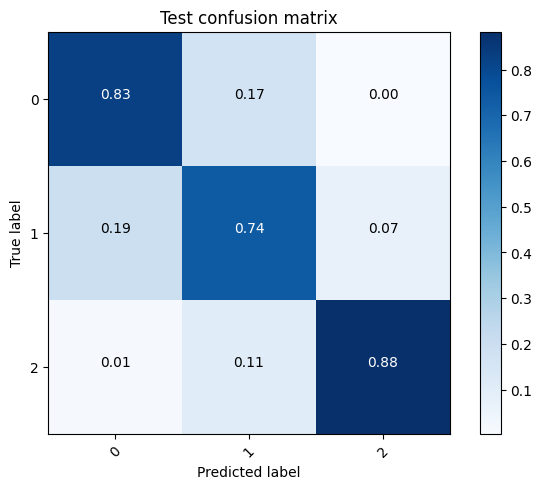

In [55]:
plot_confusion_matrix(conf_matrix_X, labels, title = "Test confusion matrix")
sum([conf_matrix_X[i, i] for i in range(3)])/800.0

# EV2S

In [65]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
      "mango/Dev",
      validation_split=0.0,
      shuffle=False,
      seed=1001,
      labels=dftest['le'].to_numpy().tolist(),
      image_size=image_size,
      batch_size=None,
)

Found 800 files belonging to 3 classes.


於訓練**EfficientNetV2S**時，我將輸入圖片的size改變，於是這邊需要重新設定已讓模型與預測檔案集相符。

In [64]:
image_size = [299, 299]
batch_size = 32

In [66]:
def parse_fn(x, y):
    x = tf.cast(x, tf.float32)
    x = tf.keras.applications.efficientnet_v2.preprocess_input(x)
    return x, tf.one_hot(y, 3)
test_ds = test_ds.map(map_func=parse_fn, num_parallel_calls=AUTOTUNE)
# 設定批次大小並將prefetch模式開啟(暫存空間為自動調整模式)。
test_ds = test_ds.batch(batch_size).prefetch(buffer_size=AUTOTUNE)

In [67]:
model = tf.keras.models.load_model('/content/drive/MyDrive/TFkeras/EfficientNetV2S.h5')
pred_V2S, conf_matrix_V2S = get_conf_matrix(test_ds, model, len(labels), 800, image_size)
print(conf_matrix_V2S[:,:])
del model
K.clear_session()

1/1 [==============================] - 0s 59ms/step
[[212  31   0]
 [ 53 228  12]
 [  3  35 226]]


Normalized confusion matrix
[[0.87242798 0.12757202 0.        ]
 [0.18088737 0.778157   0.04095563]
 [0.01136364 0.13257576 0.85606061]]


0.8325

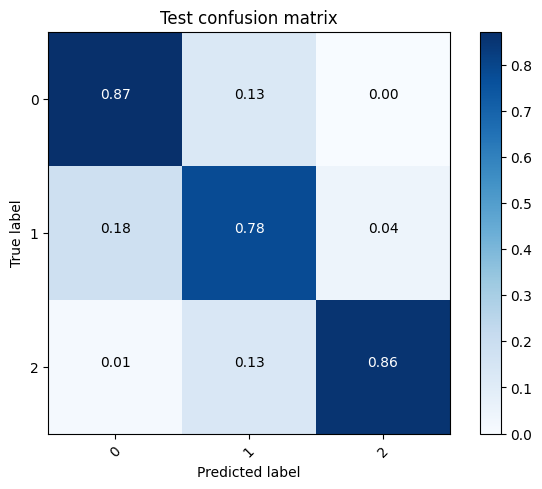

In [68]:
plot_confusion_matrix(conf_matrix_V2S, labels, title = "Test confusion matrix")
sum([conf_matrix_V2S[i, i] for i in range(3)])/800.0

# ASSEMBLE

In [69]:
true_y = []
for _,y in test_ds_EV:
    # decoding one-hot
    y = np.argmax(y, axis =1)
    true_y = np.concatenate((true_y, y))
    if len(true_y)>=800:
        break

In [70]:
true_y

array([1., 0., 1., 1., 2., 1., 2., 0., 1., 0., 0., 1., 2., 1., 2., 1., 1.,
       0., 0., 1., 0., 0., 2., 0., 1., 0., 2., 2., 1., 1., 1., 0., 2., 2.,
       0., 0., 0., 0., 0., 0., 1., 2., 0., 2., 2., 2., 1., 0., 2., 0., 1.,
       1., 1., 2., 2., 0., 1., 0., 2., 0., 1., 1., 2., 0., 1., 2., 2., 0.,
       2., 1., 2., 1., 1., 2., 2., 2., 1., 0., 2., 0., 0., 2., 1., 1., 2.,
       2., 2., 2., 0., 1., 2., 2., 1., 2., 2., 2., 1., 0., 2., 2., 2., 1.,
       1., 2., 1., 1., 1., 1., 1., 2., 2., 0., 1., 0., 0., 2., 2., 0., 2.,
       0., 1., 0., 2., 1., 2., 1., 0., 1., 2., 1., 0., 0., 0., 1., 0., 2.,
       1., 1., 0., 2., 0., 1., 2., 0., 0., 0., 2., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 2., 1., 2., 1., 0., 1., 2., 2., 1., 2., 0., 2.,
       1., 2., 2., 2., 2., 1., 0., 0., 0., 1., 2., 2., 0., 2., 1., 2., 0.,
       0., 2., 1., 2., 2., 1., 1., 2., 1., 0., 2., 1., 0., 2., 2., 1., 0.,
       1., 2., 0., 1., 2., 2., 2., 1., 1., 2., 0., 2., 1., 2., 1., 1., 0.,
       1., 1., 1., 1., 1.

### V2S + X

Normalized confusion matrix
[[0.88065844 0.11934156 0.        ]
 [0.16382253 0.79863481 0.03754266]
 [0.01136364 0.10606061 0.88257576]]


0.85125

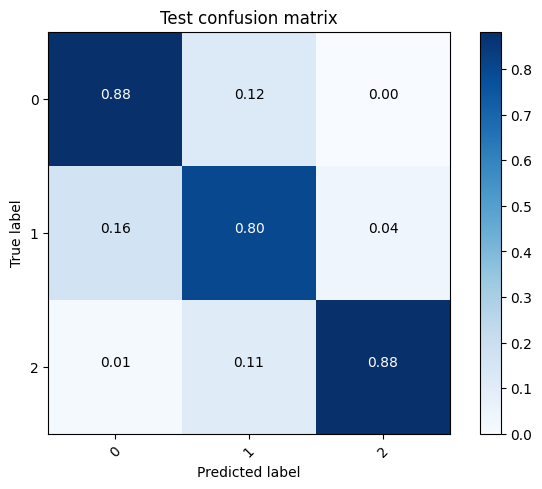

In [71]:
predmean = (pred_V2S + pred_X) / 2.
predictions = np.argmax(predmean, axis=1)
conf_matrix = confusion_matrix(true_y, predictions) # sklearn
plot_confusion_matrix(conf_matrix, labels, title = "Test confusion matrix")
sum([conf_matrix[i, i] for i in range(3)])/800.

EV2B2 + X

Normalized confusion matrix
[[0.85185185 0.14814815 0.        ]
 [0.15017065 0.80887372 0.04095563]
 [0.00757576 0.12121212 0.87121212]]


0.8425

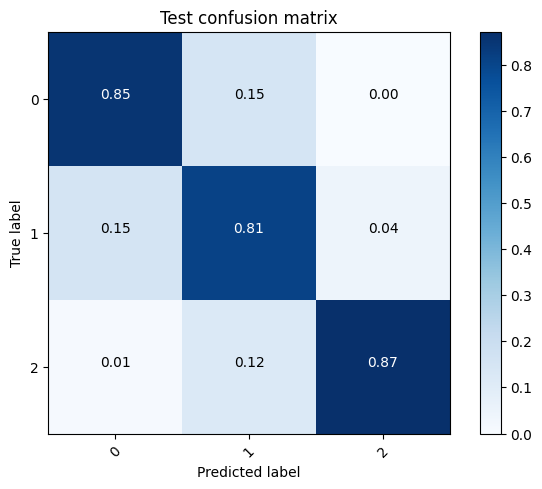

In [72]:
predmean = (pred_X + pred_V2B2) / 2.
predictions = np.argmax(predmean, axis=1)
conf_matrix = confusion_matrix(true_y, predictions) # sklearn
plot_confusion_matrix(conf_matrix, labels, title = "Test confusion matrix")
sum([conf_matrix[i, i] for i in range(3)])/800.

V2S + V2B2

Normalized confusion matrix
[[0.85596708 0.14403292 0.        ]
 [0.15017065 0.81911263 0.03071672]
 [0.01136364 0.12878788 0.85984848]]


0.84375

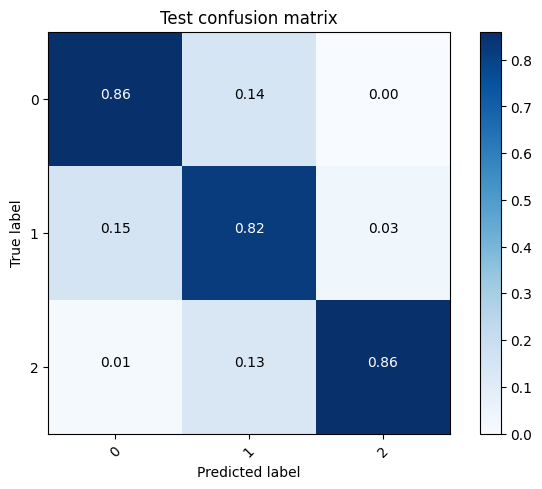

In [73]:
predmean = (pred_V2S + pred_V2B2) / 2.
predictions = np.argmax(predmean, axis=1)
conf_matrix = confusion_matrix(true_y, predictions) # sklearn
plot_confusion_matrix(conf_matrix, labels, title = "Test confusion matrix")
sum([conf_matrix[i, i] for i in range(3)])/800.

# ALL 3 Combined

Normalized confusion matrix
[[0.86831276 0.13168724 0.        ]
 [0.15358362 0.81911263 0.02730375]
 [0.01136364 0.11363636 0.875     ]]


0.8525

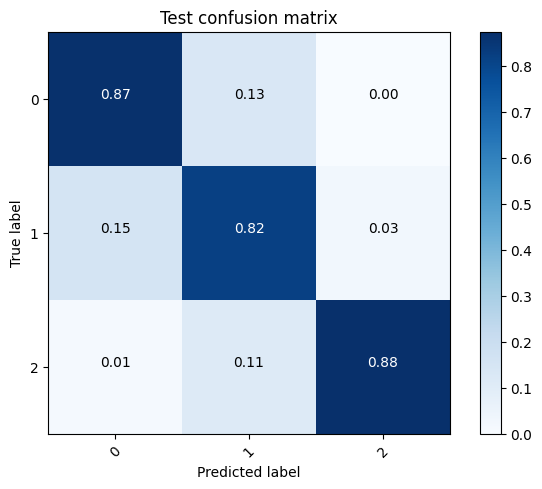

In [74]:
predmean = (pred_V2S + pred_V2B2 + pred_X) / 3.
predictions = np.argmax(predmean, axis=1)
conf_matrix = confusion_matrix(true_y, predictions) # sklearn
plot_confusion_matrix(conf_matrix, labels, title = "Test confusion matrix")
sum([conf_matrix[i, i] for i in range(3)])/800.